In [1]:
%reload_ext autoreload
%autoreload 2
# check data path
import os, sys
path=os.path.abspath(os.getcwd())
sys.path.append('../driver')
sys.path.append('../../driver')
sys.path.append('../../../messungen')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import fmr_eva as fmr_eva
# import fmr_eva2 as fmr_eva2
# import fmr_read as fmr_read
# import fmr_read2 as fmr_read2

import FMR_Reader_v210208 as FMR_Reader
import FMR_Evaluator_v210331 as FMR_eva
import corporate_design_colors_v3 as cpd

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

no style found


In [2]:
dataset_hsweep='BF Cobulky32nm HSWEEP down'
dataset_fsweep='BF Cobulky32nm LONG'
d_hsweep=FMR_Reader.read(dataset_hsweep, loc='../../../messungen/')
d_fsweep=FMR_Reader.read(dataset_fsweep, loc='../../../messungen/')

100%|██████████| 153/153 [00:23<00:00,  6.50it/s]


geometric averaging already happend


100%|██████████| 5201/5201 [01:17<00:00, 67.30it/s]


In [3]:
d_hsweep,d_fsweep

({'version': 'version from 20210422',
  'T21': array([[-0.13370899, -0.1335734 , -0.13361044, ..., -0.13587969,
          -0.13616474, -0.13607839],
         [-0.12735579, -0.12723446, -0.12729101, ..., -0.12166392,
          -0.12182733, -0.12160664],
         [-0.16875091, -0.1685878 , -0.16854512, ..., -0.16568051,
          -0.16575682, -0.16558405],
         ...,
         [-1.24161853, -1.26310401, -1.27608946, ..., -1.24447815,
          -1.24731423, -1.22059277],
         [-0.98517795, -0.93575227, -0.98316703, ..., -0.99762423,
          -0.97800745, -0.96549504],
         [-1.33015665, -1.34552408, -1.46653993, ..., -1.42365908,
          -1.44835503, -1.37655878]]),
  'phi21': array([[ -1.49980131,  -1.49981143,  -1.49943318, ...,  -1.46479465,
           -1.46469905,  -1.46479412],
         [ -1.72189791,  -1.72217165,  -1.72159091, ...,  -1.72373277,
           -1.7240472 ,  -1.72365392],
         [ -2.87019006,  -2.87127338,  -2.8695184 , ...,  -2.86219257,
           -2.8

In [4]:
Hmin=-.1
Hmax=1.1
fmin=2
fmax=40
db_hsweep=FMR_eva.binning(d_hsweep, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax)
db_fsweep=FMR_eva.complex_binning(d_fsweep, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax, NH=(Hmax-Hmin)*1000+1)

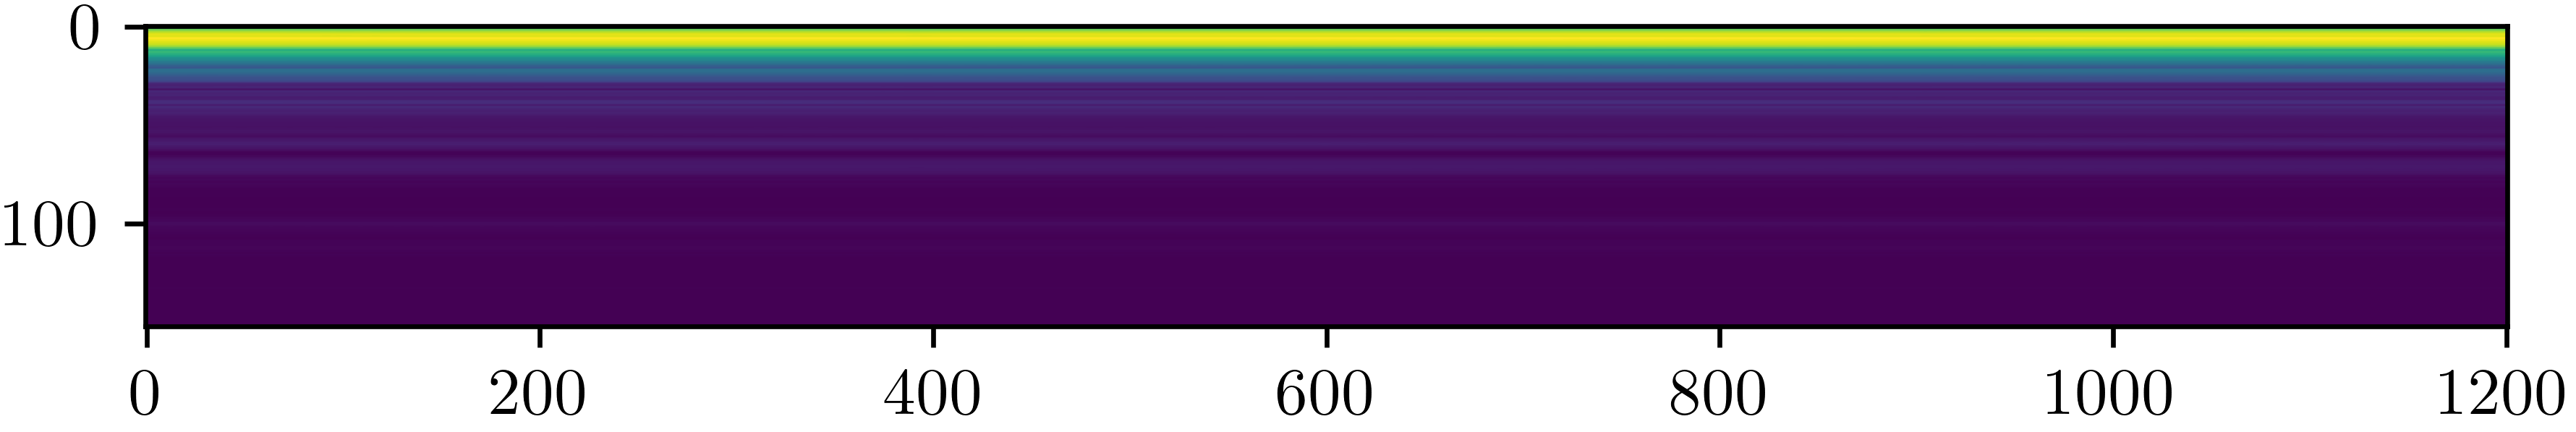

In [5]:
plt.imshow(np.abs(db_fsweep['S21']))

In [6]:
Hnorm=[1.05]
dn_hsweep=FMR_eva.normT21(db_hsweep, Hnorm=Hnorm)
dn_fsweep=FMR_eva.normS21(db_fsweep, Hnorm=Hnorm)
#dn_bf_up,dn_bf_down,dn_fh_up,dn_fh_down

In [7]:
np.abs(dn_fsweep['S21'])

array([[1.00009538, 1.00003983, 0.99999711, ..., 1.00051027, 1.00053204,
        1.00054404],
       [0.9999354 , 0.99989013, 0.99984202, ..., 1.00043686, 1.00044771,
        1.00045769],
       [0.99989894, 0.99984339, 0.99979556, ..., 1.00048161, 1.00050428,
        1.00051007],
       ...,
       [0.99563982, 0.99613922, 0.99968819, ..., 0.99803976, 1.0006087 ,
        1.0007741 ],
       [1.00116656, 1.00154998, 1.00276346, ..., 1.00301724, 1.00166639,
        1.00099379],
       [1.00397095, 1.00223194, 0.99913642, ..., 1.0043229 , 1.00256896,
        0.99903988]])

(-0.02, 0.01)

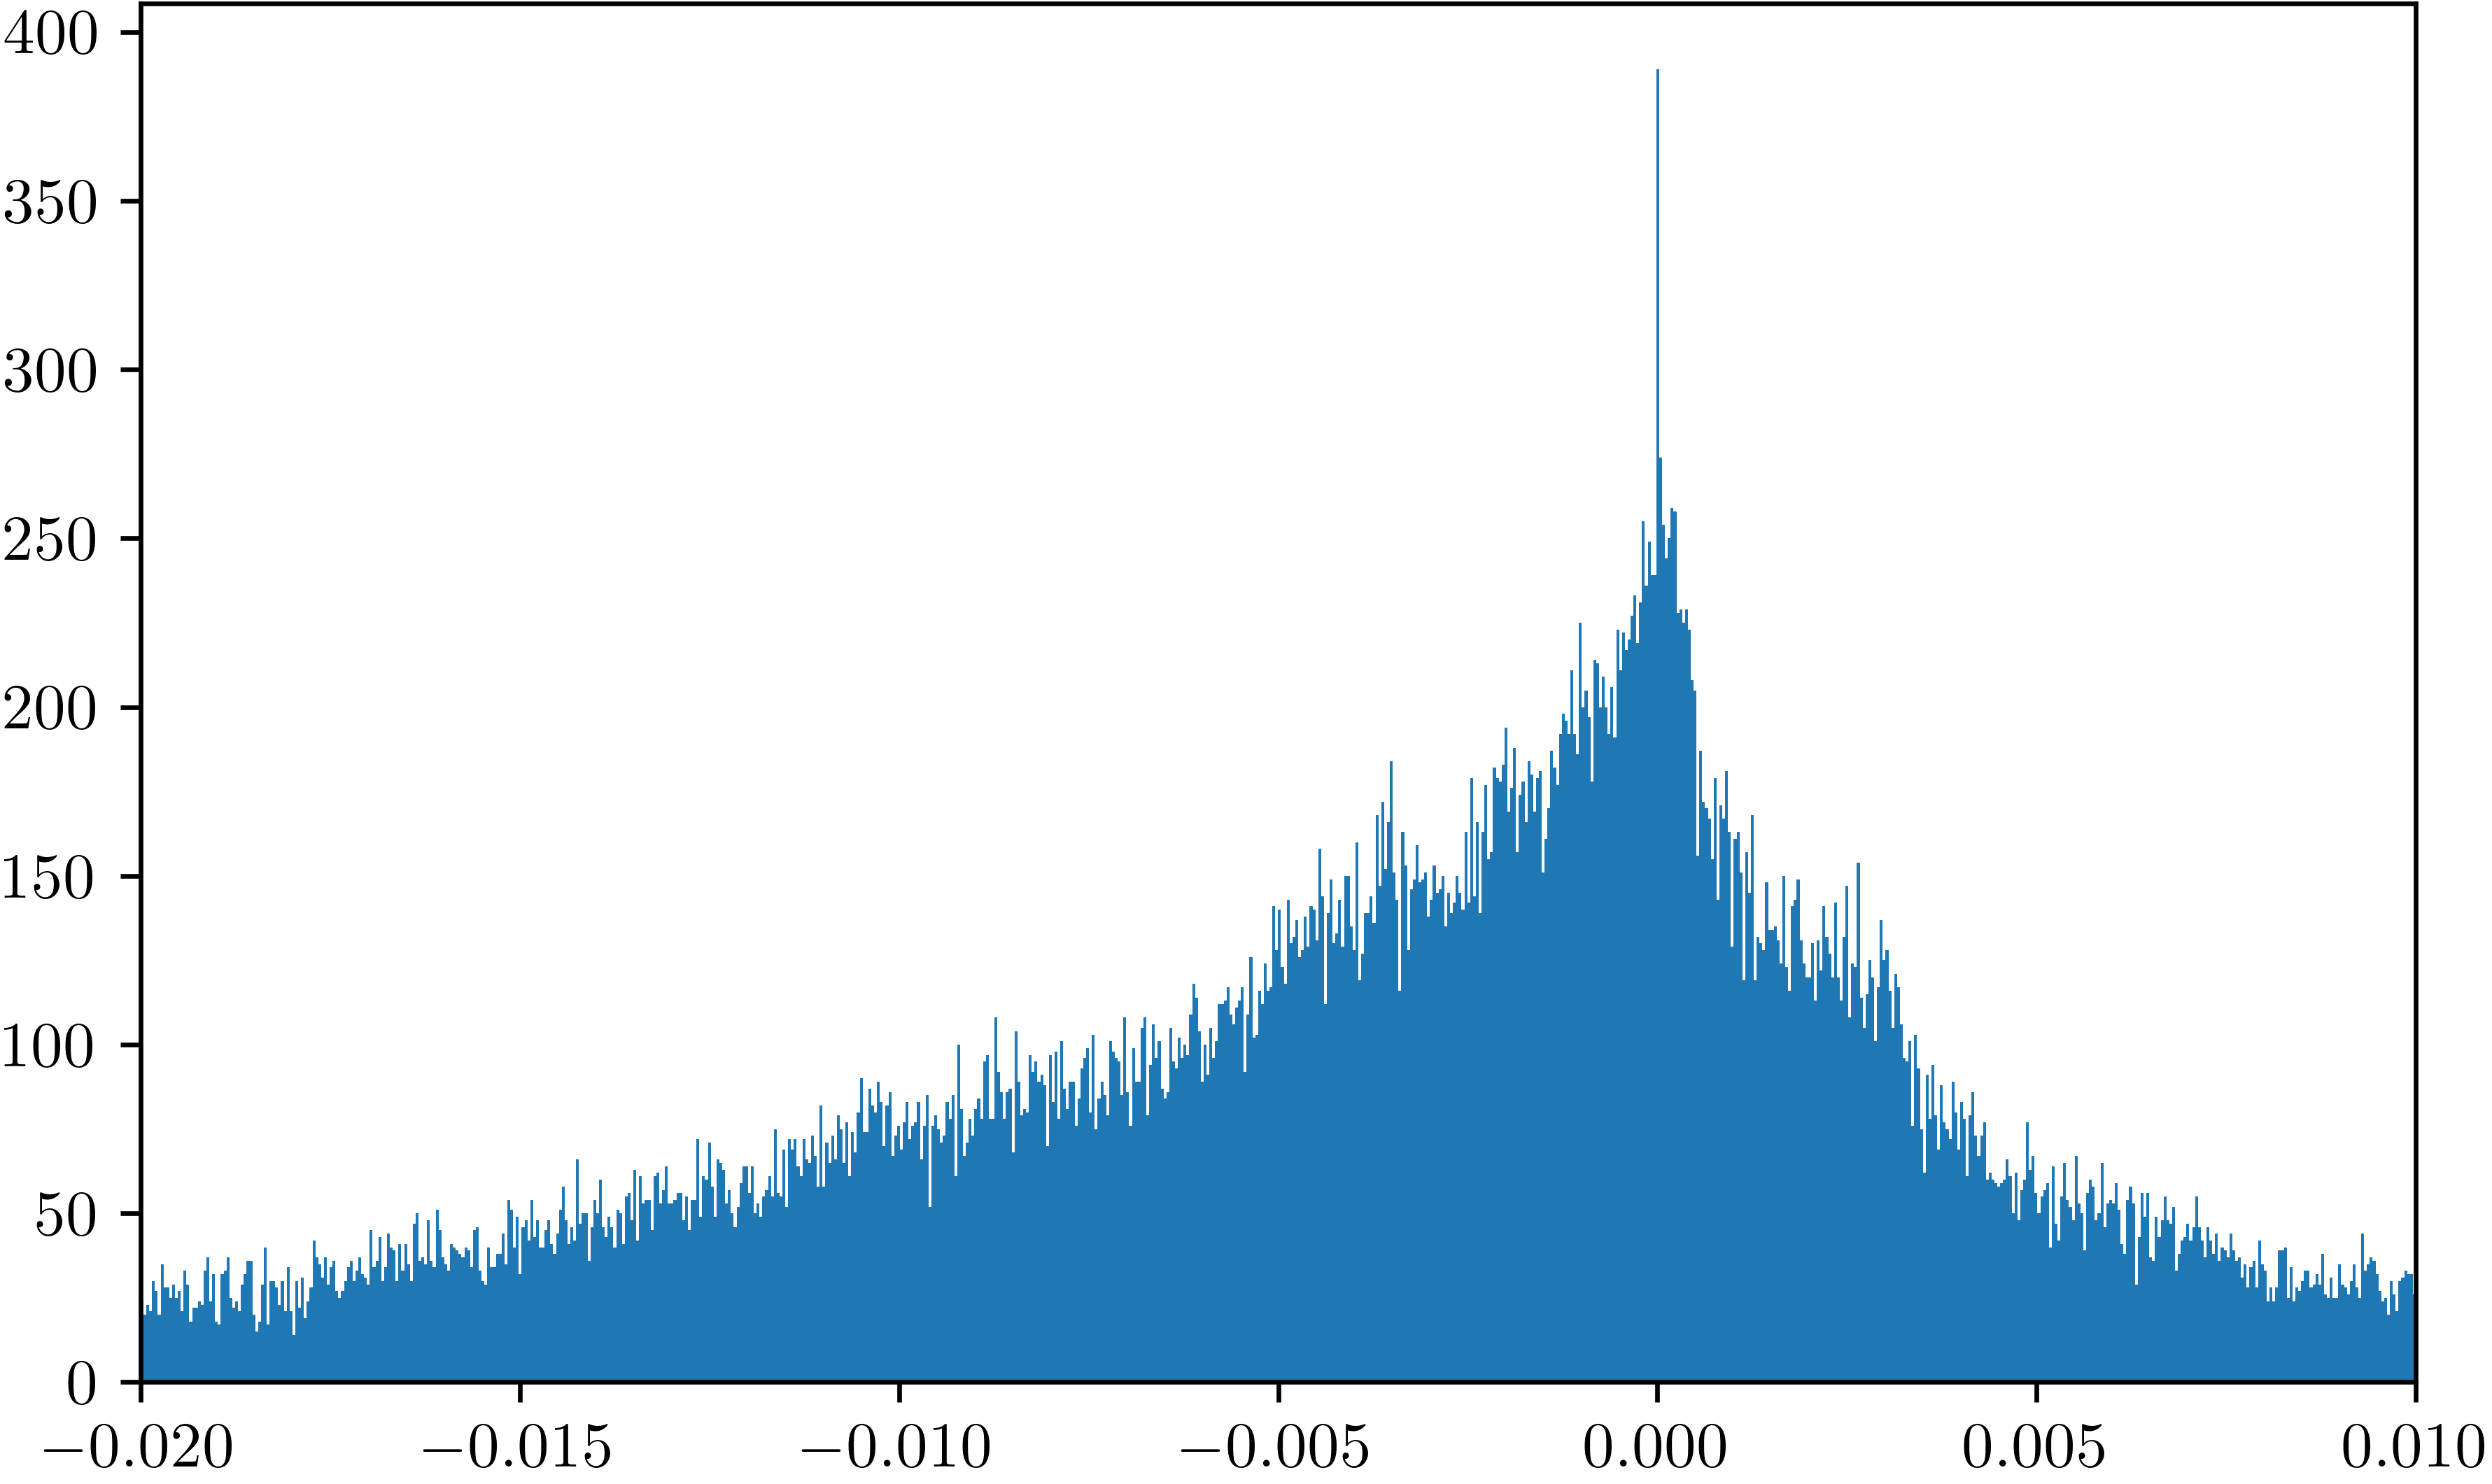

In [8]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img=dn_hsweep['T21']
plt.hist(np.ravel(img), bins=10000)
plt.xlim([-.02,.01])

<Figure size 3600x2160 with 0 Axes>

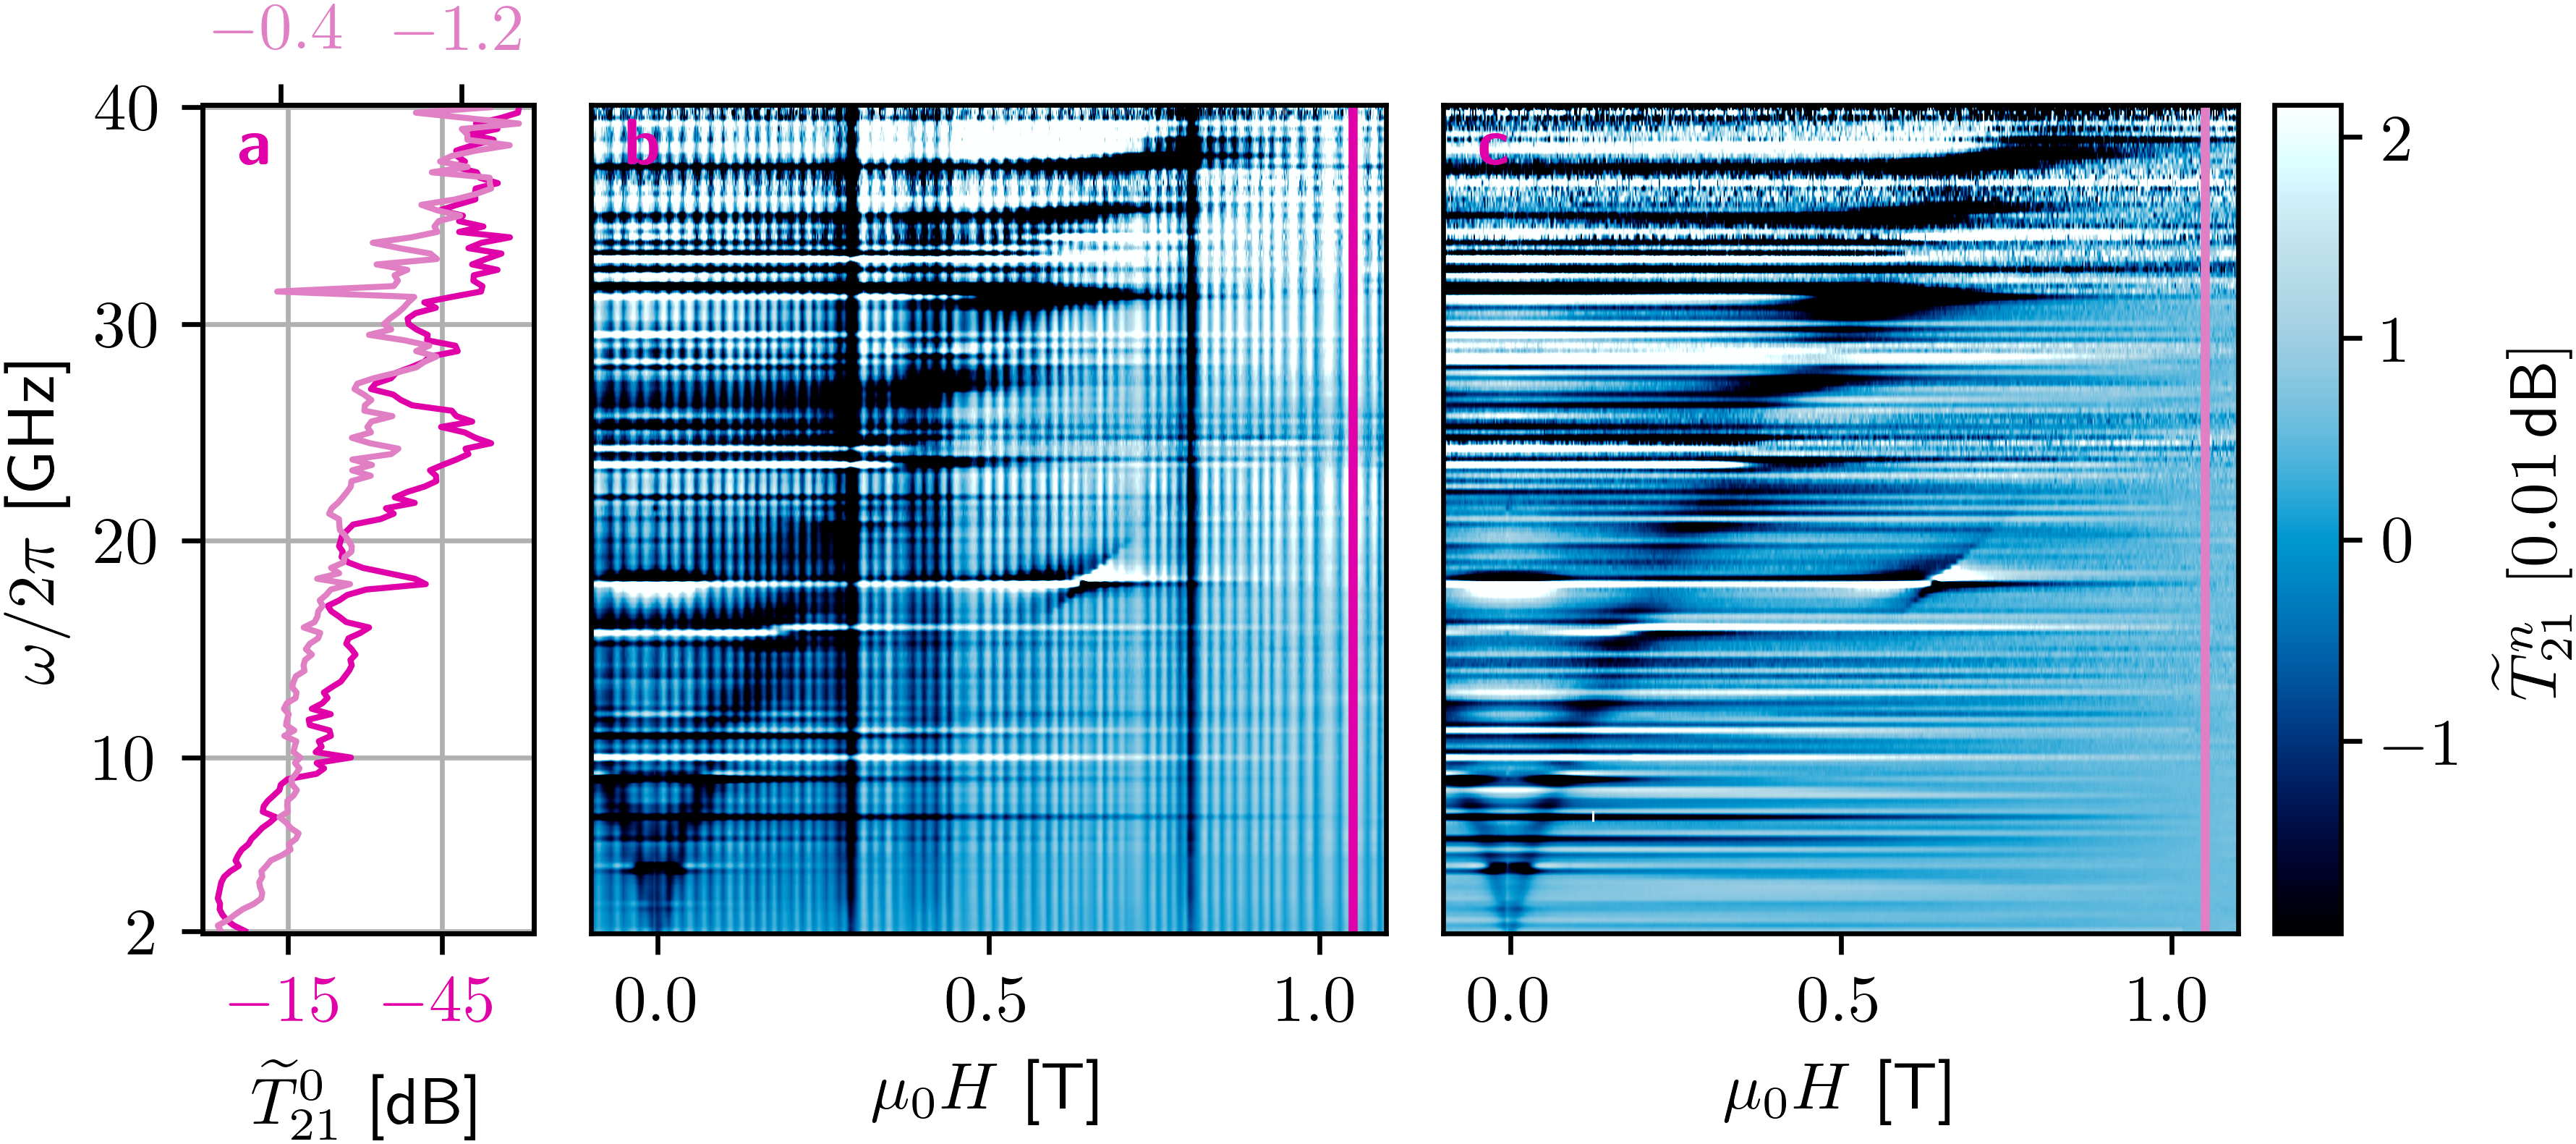

In [12]:

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img0=20*np.log10(np.abs(dn_fsweep['S21']))*100
norm0=20*np.log10(np.abs(dn_fsweep['S21norm']))
posN0=dn_fsweep['Hnorm']
H0=dn_fsweep['H']
freq0=dn_fsweep['f']

img1=dn_hsweep['T21']*100
norm1=dn_hsweep['T21norm']
posN1=dn_hsweep['Hnorm']
H1=dn_hsweep['H']
freq1=dn_hsweep['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$\widetilde{T}_{21}^0$ [dB]'
clabel='$\widetilde{T}^n_{21}\ [0.01\,$dB$]$'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH0=np.abs(H0[0]-H0[1])/2
stepsizef0=np.abs(freq0[-1]-freq0[-2])/2
Hind0=[np.abs(H0-Hlim[0]).argmin(),
      np.abs(H0-Hlim[1]).argmin()+1]
find0=[np.abs(freq0-flim[0]).argmin(),
      np.abs(freq0-flim[1]).argmin()+1]
img0=img0[find0[0]:find0[1],
        Hind0[0]:Hind0[1]]
ext0=[H0[Hind0[0]]-stepsizeH0,
     H0[Hind0[1]-1]+stepsizeH0,
     freq0[find0[0]]-stepsizef0,
     freq0[find0[1]-1]+stepsizef0]
freq0=freq0[find0[0]:find0[1]]
H0=H0[Hind0[0]:Hind0[1]]

stepsizeH1=np.abs(H1[0]-H1[1])/2
stepsizef1=np.abs(freq1[-1]-freq1[-2])/2
Hind1=[np.abs(H1-Hlim[0]).argmin(),
      np.abs(H1-Hlim[1]).argmin()+1]
find1=[np.abs(freq1-flim[0]).argmin(),
      np.abs(freq1-flim[1]).argmin()+1]
img1=img1[find1[0]:find1[1],
        Hind1[0]:Hind1[1]]
ext1=[H1[Hind1[0]]-stepsizeH1,
     H1[Hind1[1]-1]+stepsizeH1,
     freq1[find1[0]]-stepsizef1,
     freq1[find1[1]-1]+stepsizef1]
freq1=freq1[find1[0]:find1[1]]
H1=H1[Hind1[0]:Hind1[1]]

#img=np.dstack((img0.flatten,img1.flatten))
img0[img0==-np.inf]=np.nan
img0[img0==np.inf]=np.nan
clim0=(np.nanmean(img0)-contrast*np.nanstd(img0),
      np.nanmean(img0)+contrast*np.nanstd(img0))
img1[img1==-np.inf]=np.nan
img1[img1==np.inf]=np.nan
clim1=(np.nanmean(img1)-contrast*np.nanstd(img1),
      np.nanmean(img1)+contrast*np.nanstd(img1))
clim=((clim0[0]+clim1[0])/2,(clim0[1]+clim1[1])/2)
# clim1=(-.025,.025)
# img0=(img0-clim0[1])/clim0[0]
# clim0=(0,1)

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img0, ax_img1, ax_clb) = plt.subplots(ncols=4,figsize=(6,2.7),
                                    gridspec_kw={"width_ratios":[1,2.4,2.4,.2]},
                                    constrained_layout=True)        

norm0=norm0[find0[0]:find0[1]]
ax_norm.plot(norm0,freq0,c=cpd.curves(color='magenta')(1))   
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext0[2],ext0[3])
ax_norm.grid()
ax_norm.invert_xaxis()
ax_norm.set_yticks([40,30,20,10,2])
ax_norm.tick_params(axis='x', labelcolor=cpd.curves(color='magenta')(1))

ax_norm_2=ax_norm.twiny()
norm1=norm1[find1[0]:find1[1]] 
ax_norm_2.plot(norm1,freq1,c=cpd.images(color='magenta')(.65)) 
ax_norm_2.invert_xaxis()
ax_norm_2.set_xticks([-.4,-1.2])
ax_norm_2.tick_params(axis='x', labelcolor=cpd.images(color='magenta')(.65))

nlim0=[np.min(norm0),np.max(norm0)]
enn0=np.abs(nlim0[1]-nlim0[0])/4
nlim0=np.around(([(nlim0[0]+enn0)*2,(nlim0[1]-enn0)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim0)

# Take care of image and colorbar   
ax_img0.set_yticks([])
ax_img0.set_yticklabels([])
im0 = ax_img0.imshow(img0, 
                   extent=ext0, 
                   aspect='auto',
                   origin='lower',
                   clim=clim0,
                   cmap=cpd.images())
ax_img0.set_xlabel(xlabel)
ax_img0.vlines(posN0, ymin=ext0[2], ymax=ext0[3], lw=1.5,
             color=cpd.curves(color='magenta')(1),
             label="$H_n=%3.2f\,$T"%float(posN0))

ax_img1.set_yticks([])
ax_img1.set_yticklabels([])
im1 = ax_img1.imshow(img1, 
                   extent=ext1, 
                   aspect='auto',
                   origin='lower',
                   clim=clim1,
                   cmap=cpd.images())
ax_img1.set_xlabel(xlabel)
ax_img1.vlines(posN1, ymin=ext1[2], ymax=ext1[3], lw=1.5,
             color=cpd.images(color='magenta')(.65),
             label="$H_n=%3.2f\,$T"%float(posN1))

#ax_norm.text(nlim[0],ext[2]+(ext[3]-ext[2])/20, rotation='vertical',
# fig.text(.805,.035,
#             "$H_n=%3.2f\,$T"%float(posN0),
#             color=cpd.curves(color='magenta')(1),
#             bbox=dict(facecolor='white', 
#                       edgecolor=cpd.curves(color='magenta')(1), 
#                       boxstyle='round'))
#ax_clb.set_xticks([0])
# ax_clb.set_xlabel("$H_n=%3.2f\,$T"%float(posN),
#              color=cpd.curves(color='seeblau')(1))

#ax_img0.set_xticks(np.linspace(.1,.9,5))
#ax_img0.set_xticks(list(ax_img.get_xticks()))
#ax_img.get_xticklabels()[-1].set_color(cpd.images(color='magenta')(.5))

ax_img0.set_xlim(ext0[0],ext0[1])
ax_img0.set_ylim(ext0[2],ext0[3])

cbar=fig.colorbar(im0,label=clabel, cax=ax_clb)

ax_norm.annotate(r'\textbf{a}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img0.annotate(r'\textbf{b}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_img1.annotate(r'\textbf{c}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')

fig.savefig('hf_sweep.pgf')

In [10]:
img0, np.nanmin(img0), np.nanmax(img0)

(array([[ 8.28457931e-02,  3.45965162e-02, -2.51408315e-03, ...,
          4.43101358e-01,  4.61999141e-01,  4.72421348e-01],
        [-5.61146071e-02, -9.54352242e-02, -1.37231291e-01, ...,
          3.79370098e-01,  3.88792895e-01,  3.97454430e-01],
        [-8.77842991e-02, -1.36039206e-01, -1.77589406e-01, ...,
          4.18222322e-01,  4.37901697e-01,  4.42931642e-01],
        ...,
        [-3.79548374e+00, -3.35991797e+00, -2.70879878e-01, ...,
         -1.70431032e+00,  5.28546860e-01,  6.72117417e-01],
        [ 1.01266817e+00,  1.34525648e+00,  2.39700089e+00, ...,
          2.61679804e+00,  1.44620361e+00,  8.62763236e-01],
        [ 3.44229636e+00,  1.93647886e+00, -7.50419411e-01, ...,
          3.74672957e+00,  2.22851123e+00, -8.34351018e-01]]),
 -19.848308188393315,
 18.105916231233476)

In [14]:
def binning(d, 
           fmin=False,
           fmax=False,
           Hmin=False,
           Hmax=False,
           Nf=False,
           NH=False):
    
    # Get Binning extent
    if Hmin is False:
        Hmin=np.nanmin(d['H'])
    if Hmax is False:
        Hmax=np.nanmax(d['H'])
    if fmin is False:
        fmin=np.nanmin(d['f'])
    if fmax is False:
        fmax=np.nanmax(d['f'])
    ext=[[Hmin,Hmax], [fmin,fmax]]
        
    # Get Binning resolution
    checkH=np.argmin(np.abs(d['H']-Hmax))-np.argmin(np.abs(d['H']-Hmin))+1
    if NH is False:NH=checkH
    elif NH>checkH:print('Error: Oversampling in H-direction!')
        
    checkf=np.argmin(np.abs(d['f']-fmax))-np.argmin(np.abs(d['f']-fmin))+1
    if Nf is False:Nf=checkf
    elif Nf>checkf:print('Error: Oversampling in f-direction!')
    res=[NH,Nf]
    
    # Get 2D grids
    abso=d['T21']
    HH, ff =np.meshgrid(d['H'],d['f'])
    
    # from 2D grids, to 1D rows
    X, Y = np.ravel(HH), np.ravel(ff)
    Zabso = np.ravel(abso)
    
    # Bin that stuff
    abso_SUM, x,y = np.histogram2d(X,Y,
                                   bins=res, 
                                   range=ext, 
                                   normed=False, 
                                   weights=Zabso)
    counter, x,y = np.histogram2d(X,Y,
                                  bins=res, 
                                  range=ext, 
                                  normed=False, 
                                  weights=None)
    
    # get that binned stuff back together.
    db={'ext(H,f)':[Hmin,Hmax,fmin,fmax],
        'res(H,f)':[NH,Nf]}
    db['T21']=abso_SUM.T/counter.T
    db['f']=np.linspace(fmin,fmax,Nf)
    db['H']=np.linspace(Hmin,Hmax,NH)
    return db

In [21]:
def normT21(db,Hnorm='max'):
    '''
    db: H,f,S21
    Hnorm: 'max', 'min', 'ext', [-1,1]
    
    return
    dn: H, Hnorm, S21, S21norm, f
    '''
    
    H=db['H']
    abso=db['T21']
    
    # get Positions
    if Hnorm=='max':
        pos=[np.argmin(np.abs(H-np.nanmax(H)))]
    elif Hnorm=='min':
        pos=[np.argmin(np.abs(H-np.nanmin(H)))]
    elif Hnorm=='ext':
        pos=[np.argmin(np.abs(H-np.nanmax(H))),
             np.argmin(np.abs(H-np.nanmin(H)))]
    else:
        pos= [0 for x in range(len(Hnorm))]
        for i,h in enumerate(Hnorm):
            pos[i]=np.argmin(np.abs(H-h))
    
    
    
    # get Normalization
    lenpos=len(pos)
    Habso=0
    Hnorm=[]
    for p in pos:
        Habso=Habso+abso[:,p]/lenpos
        Hnorm.append(H[pos])
        
    # gridden
    X = np.ones((len(H)))
    ones, HHabso   = np.meshgrid(X,Habso)
    
    # Normen
    HHT21=HHabso
    norm=1/np.abs(HHT21)
    abso=abso*norm
    
    # Build normated Dataset
    dn={}
    dn['H']=H
    dn['Hnorm']=np.array(Hnorm)
    dn['T21']=abso
    dn['T21norm']=Habso
    dn['f']=db['f']
    
    return dn